In [34]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    HistGradientBoostingRegressor,
    GradientBoostingRegressor, 
    RandomForestRegressor
)
import joblib

In [2]:
from sklearn.datasets import load_diabetes
diab = load_diabetes(as_frame=True)

In [3]:
print(diab.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
print( diab.__format__)

<built-in method __format__ of Bunch object at 0x000002033DE801D0>


In [9]:
diabetes_df = pd.DataFrame(data=diab.data,
                           columns=diab.feature_names)

In [10]:
diabetes_df['target'] = diab.target

In [11]:
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [12]:
print( diabetes_df.shape)

(442, 11)


In [20]:
X, y = diab.data, diab.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
rf2 = RandomForestRegressor(n_estimators=100, random_state=0)
rf2.fit(X_train, y_train)
print("\nDiabetes veri seti — RF Test R²:", round(r2_score(y_test, rf2.predict(X_test)),4))



Diabetes veri seti — RF Test R²: 0.4121


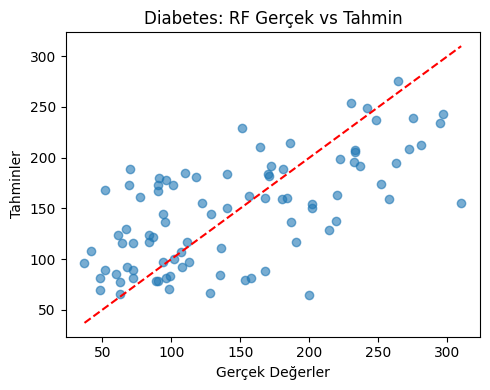

In [30]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, rf2.predict(X_test), alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Diabetes: RF Gerçek vs Tahmin")
plt.tight_layout()
plt.show()

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [44]:
preds = lr_model.predict(X_test)
print("LinearRegression R² skor:", r2_score(y_test, preds))

LinearRegression R² skor: 0.4526027629719196


In [46]:

dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)


preds = dt_model.predict(X_test)
print("DecisionTreeRegressor R² skor:", r2_score(y_test, preds))

DecisionTreeRegressor R² skor: -0.003018848771858318


In [47]:
models = {
    "LinearRegression": lr_model,
    "RandomForest": rf2,
    "DecisionTree": dt_model
}


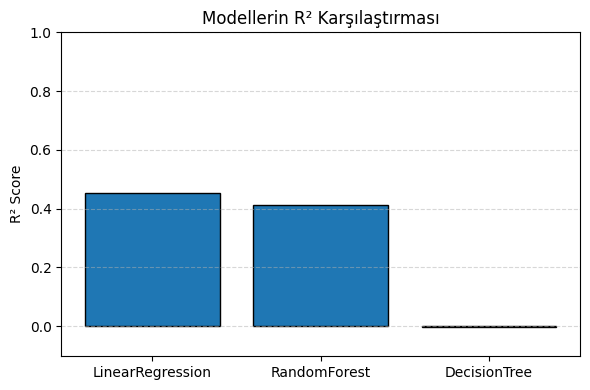

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

In [48]:
# 1) R² Karşılaştırması (Bar Chart)
names  = list(models.keys())
scores = [r2_score(y_test, m.predict(X_test)) for m in models.values()]

plt.figure(figsize=(6,4))
plt.bar(names, scores, edgecolor="k")
plt.ylim(min(scores) - 0.1, 1)  # Negatif skor varsa alt sınırı biraz aşağı çekin
plt.ylabel("R² Score")
plt.title("Modellerin R² Karşılaştırması")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 2) Tahmin vs Gerçek Dağılımı (Scatter Plots)
plt.figure(figsize=(15,4))

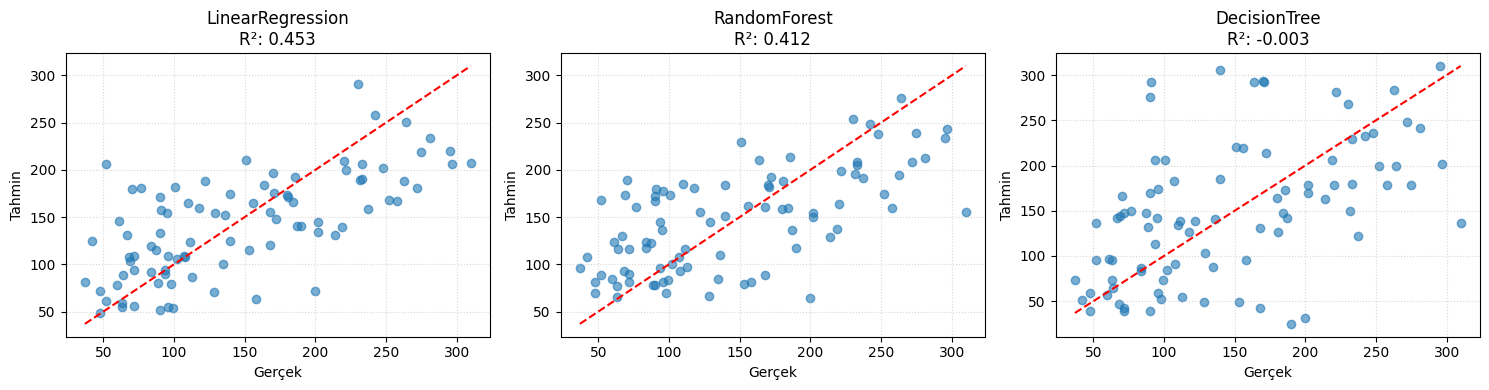

In [49]:
# 2) Tahmin vs Gerçek Dağılımı (Scatter Plots)
plt.figure(figsize=(15,4))

for i, (name, model) in enumerate(models.items(), start=1):
    preds = model.predict(X_test)
    plt.subplot(1, 3, i)
    plt.scatter(y_test, preds, alpha=0.6)
    # y = x çizgisi
    mn, mx = y_test.min(), y_test.max()
    plt.plot([mn, mx], [mn, mx], 'r--')
    plt.xlabel("Gerçek")
    plt.ylabel("Tahmin")
    plt.title(f"{name}\nR²: {r2_score(y_test, preds):.3f}")
    plt.grid(True, linestyle=":", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score

for j in [0.1, 0.05, 0.001]:   
    for i in [100, 200, 300, 400, 500]:
     
        model = HistGradientBoostingRegressor(
            max_iter=i,
            learning_rate=j,
            random_state=42,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10
        )
    
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
      
        r2 = r2_score(y_test, y_pred)
        print(f"learning_rate={j:6}  max_iter={i:3}  →  R2_score={r2:.4f}")
    print("-" * 40)


learning_rate=   0.1  max_iter=100  →  R2_score=0.4592
learning_rate=   0.1  max_iter=200  →  R2_score=0.4592
learning_rate=   0.1  max_iter=300  →  R2_score=0.4592
learning_rate=   0.1  max_iter=400  →  R2_score=0.4592
learning_rate=   0.1  max_iter=500  →  R2_score=0.4592
----------------------------------------
learning_rate=  0.05  max_iter=100  →  R2_score=0.4544
learning_rate=  0.05  max_iter=200  →  R2_score=0.4544
learning_rate=  0.05  max_iter=300  →  R2_score=0.4544
learning_rate=  0.05  max_iter=400  →  R2_score=0.4544
learning_rate=  0.05  max_iter=500  →  R2_score=0.4544
----------------------------------------
learning_rate= 0.001  max_iter=100  →  R2_score=0.0595
learning_rate= 0.001  max_iter=200  →  R2_score=0.1248
learning_rate= 0.001  max_iter=300  →  R2_score=0.1803
learning_rate= 0.001  max_iter=400  →  R2_score=0.2285
learning_rate= 0.001  max_iter=500  →  R2_score=0.2674
----------------------------------------
